In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# ============================================================
# DATA SETUP - AVERAGE ACROSS BOTH MODELS (LR + DT)
# ============================================================

datasets = ['Iris (150 rows)', 'SUSY (5M rows)', 'Amazon (12M rows)']
frameworks = ['PySpark\nVanilla', 'PySpark\nOptimized', 'MapReduce']

# Average metrics across LR and DT for each framework
data = {
    'Iris': {
        'accuracy': {
            'PySpark Vanilla': 0.9783,
            'PySpark Optimized': 0.9783,
            'MapReduce': 0.9778
        },
        'training_time': {
            'PySpark Vanilla': (0.43 + 0.30) / 2,
            'PySpark Optimized': (0.49 + 0.37) / 2,
            'MapReduce': (0.0065 + 0.0052) / 2
        },
        'total_time': {
            'PySpark Vanilla': 1.96,
            'PySpark Optimized': 1.42,
            'MapReduce': 31.0
        }
    },
    'SUSY': {
        'accuracy': {
            'PySpark Vanilla': (0.7851 + 0.7710) / 2,
            'PySpark Optimized': (0.7857 + 0.7729) / 2,
            'MapReduce': (0.7875 + 0.7713) / 2
        },
        'training_time': {
            'PySpark Vanilla': (7.94 + 5.22) / 2,
            'PySpark Optimized': (8.41 + 5.34) / 2,
            'MapReduce': (0.1277 + 0.3545) / 2
        },
        'total_time': {
            'PySpark Vanilla': 43.68,
            'PySpark Optimized': 31.23,
            'MapReduce': 78.0
        }
    },
    'Amazon': {
        'accuracy': {
            'PySpark Vanilla': (0.7725 + 0.7839) / 2,
            'PySpark Optimized': (0.7725 + 0.7839) / 2,
            'MapReduce': (0.5761 + 0.5785) / 2
        },
        'training_time': {
            'PySpark Vanilla': (11.78 + 7.72) / 2,
            'PySpark Optimized': (15.20 + 20.35) / 2,
            'MapReduce': (5.3371 + 0.3851) / 2
        },
        'total_time': {
            'PySpark Vanilla': 114.24,
            'PySpark Optimized': 85.51,
            'MapReduce': 239.0
        }
    }
}

colors = {
    'PySpark Vanilla': '#FF6B6B',
    'PySpark Optimized': '#4ECDC4',
    'MapReduce': '#95E1D3'
}

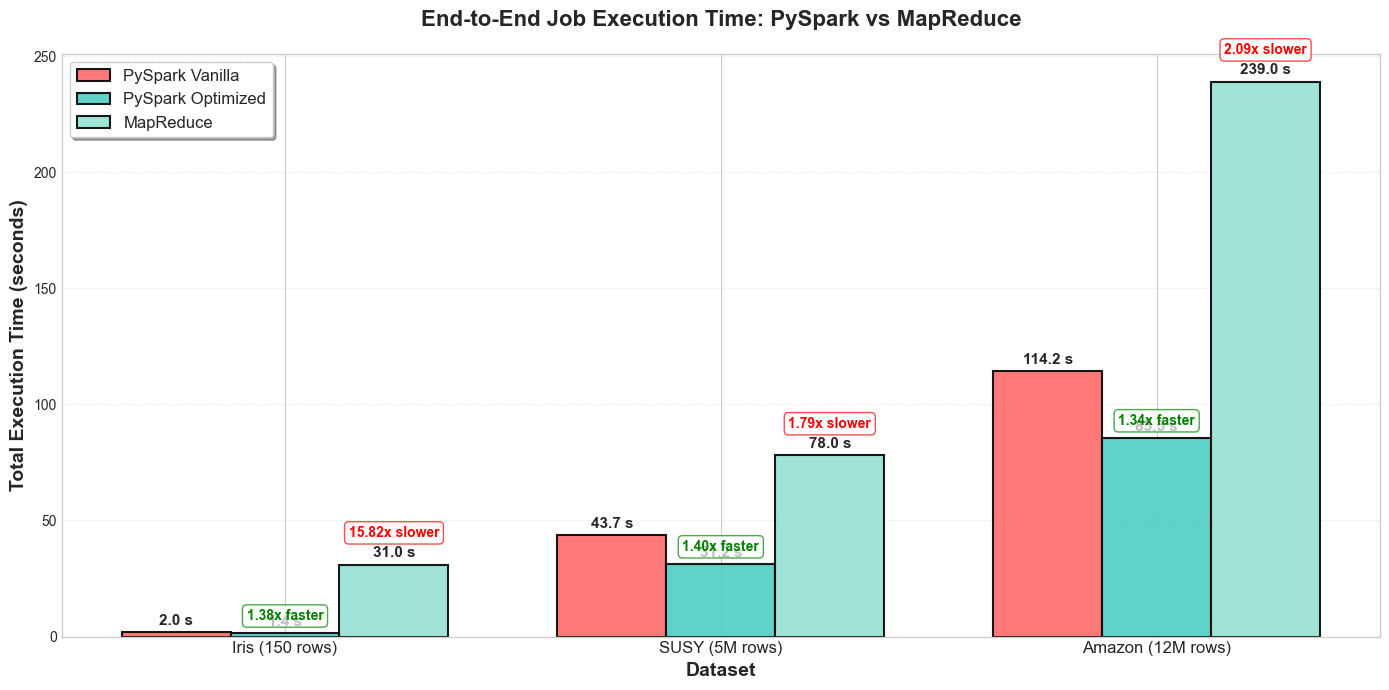

In [16]:
# ============================================================
# PLOT 1: TOTAL JOB EXECUTION TIME COMPARISON (Main Focus)
# ============================================================
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(datasets))
width = 0.25

vanilla_times = [data['Iris']['total_time']['PySpark Vanilla'],
                 data['SUSY']['total_time']['PySpark Vanilla'],
                 data['Amazon']['total_time']['PySpark Vanilla']]

optimized_times = [data['Iris']['total_time']['PySpark Optimized'],
                   data['SUSY']['total_time']['PySpark Optimized'],
                   data['Amazon']['total_time']['PySpark Optimized']]

mapreduce_times = [data['Iris']['total_time']['MapReduce'],
                   data['SUSY']['total_time']['MapReduce'],
                   data['Amazon']['total_time']['MapReduce']]

bars1 = ax.bar(x - width, vanilla_times, width, label='PySpark Vanilla', 
               color=colors['PySpark Vanilla'], alpha=0.9, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, optimized_times, width, label='PySpark Optimized', 
               color=colors['PySpark Optimized'], alpha=0.9, edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, mapreduce_times, width, label='MapReduce', 
               color=colors['MapReduce'], alpha=0.9, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Dataset', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Execution Time (seconds)', fontsize=14, fontweight='bold')
ax.set_title('End-to-End Job Execution Time: PySpark vs MapReduce', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=12)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for container in [bars1, bars2, bars3]:
    ax.bar_label(container, fmt='%.1f s', padding=3, fontsize=11, fontweight='bold')

# Add speedup annotations
for i in range(len(datasets)):
    # Optimized vs Vanilla
    speedup1 = vanilla_times[i] / optimized_times[i]
    ax.annotate(f'{speedup1:.2f}x faster', 
                xy=(x[i], optimized_times[i]), 
                xytext=(x[i], optimized_times[i] + max(vanilla_times) * 0.05),
                ha='center', fontsize=10, color='green', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='green', alpha=0.7))
    
    # MapReduce vs Vanilla (slowdown)
    slowdown = mapreduce_times[i] / vanilla_times[i]
    ax.annotate(f'{slowdown:.2f}x slower', 
                xy=(x[i] + width, mapreduce_times[i]), 
                xytext=(x[i] + width, mapreduce_times[i] + max(mapreduce_times) * 0.05),
                ha='center', fontsize=10, color='red', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.7))

plt.tight_layout()
plt.show()



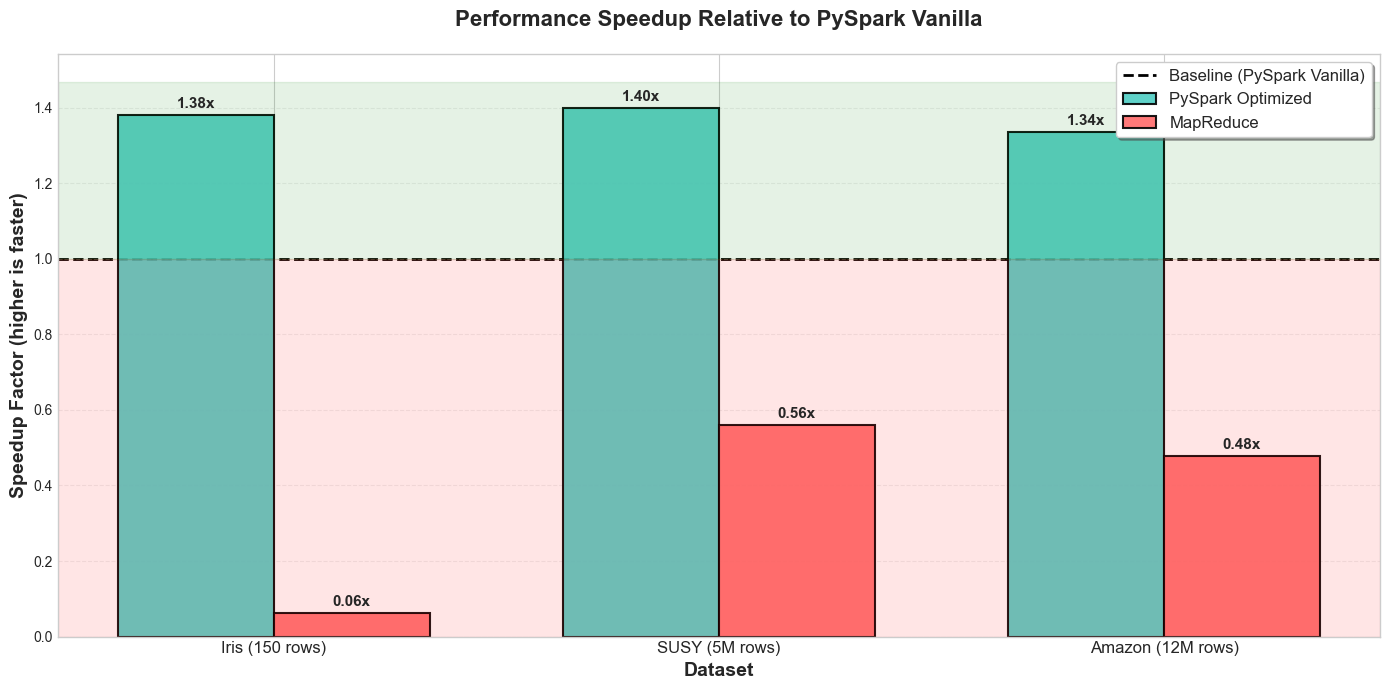

In [17]:
# ============================================================
# PLOT 2: SPEEDUP COMPARISON (Relative to PySpark Vanilla)
# ============================================================
fig, ax = plt.subplots(figsize=(14, 7))

speedup_optimized = [vanilla_times[i] / optimized_times[i] for i in range(3)]
speedup_mapreduce = [vanilla_times[i] / mapreduce_times[i] for i in range(3)]

x = np.arange(len(datasets))
width = 0.35

bars1 = ax.bar(x - width/2, speedup_optimized, width, label='PySpark Optimized', 
               color='#4ECDC4', alpha=0.9, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, speedup_mapreduce, width, label='MapReduce', 
               color='#FF6B6B', alpha=0.9, edgecolor='black', linewidth=1.5)

# Add baseline at 1.0
ax.axhline(y=1.0, color='black', linestyle='--', linewidth=2, label='Baseline (PySpark Vanilla)', zorder=0)

ax.set_xlabel('Dataset', fontsize=14, fontweight='bold')
ax.set_ylabel('Speedup Factor (higher is faster)', fontsize=14, fontweight='bold')
ax.set_title('Performance Speedup Relative to PySpark Vanilla', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=12)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for container in [bars1, bars2]:
    labels = [f'{v:.2f}x' for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=11, fontweight='bold')

# Highlight region above and below baseline
ax.axhspan(1.0, ax.get_ylim()[1], alpha=0.1, color='green', label='Faster than Vanilla')
ax.axhspan(0, 1.0, alpha=0.1, color='red', label='Slower than Vanilla')

plt.tight_layout()
plt.show()



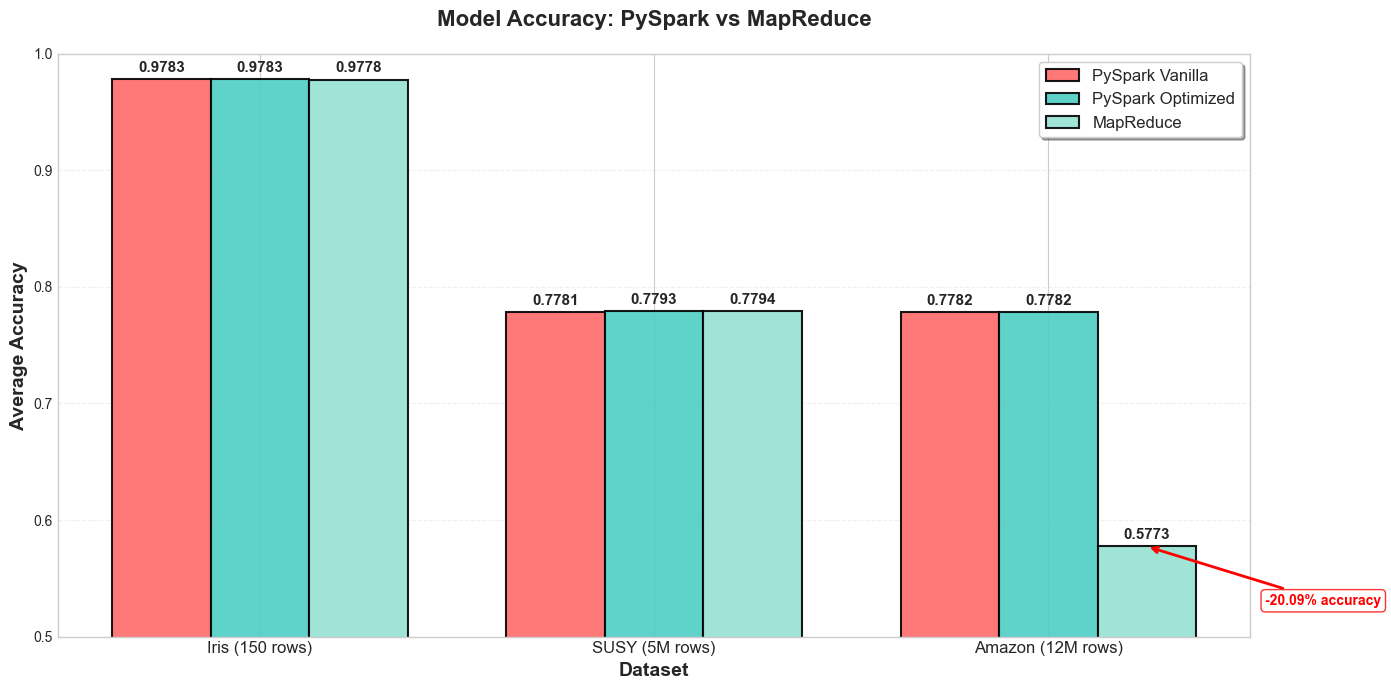

In [18]:
# ============================================================
# PLOT 3: ACCURACY COMPARISON
# ============================================================
fig, ax = plt.subplots(figsize=(14, 7))

vanilla_acc = [data['Iris']['accuracy']['PySpark Vanilla'],
               data['SUSY']['accuracy']['PySpark Vanilla'],
               data['Amazon']['accuracy']['PySpark Vanilla']]

optimized_acc = [data['Iris']['accuracy']['PySpark Optimized'],
                 data['SUSY']['accuracy']['PySpark Optimized'],
                 data['Amazon']['accuracy']['PySpark Optimized']]

mapreduce_acc = [data['Iris']['accuracy']['MapReduce'],
                 data['SUSY']['accuracy']['MapReduce'],
                 data['Amazon']['accuracy']['MapReduce']]

x = np.arange(len(datasets))
width = 0.25

bars1 = ax.bar(x - width, vanilla_acc, width, label='PySpark Vanilla', 
               color=colors['PySpark Vanilla'], alpha=0.9, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, optimized_acc, width, label='PySpark Optimized', 
               color=colors['PySpark Optimized'], alpha=0.9, edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, mapreduce_acc, width, label='MapReduce', 
               color=colors['MapReduce'], alpha=0.9, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Dataset', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Model Accuracy: PySpark vs MapReduce', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=12)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0.5, 1.0])

# Add value labels on bars
for container in [bars1, bars2, bars3]:
    ax.bar_label(container, fmt='%.4f', padding=3, fontsize=11, fontweight='bold')

# Add accuracy difference annotations for Amazon (where MapReduce is notably worse)
acc_diff = vanilla_acc[2] - mapreduce_acc[2]
ax.annotate(f'-{acc_diff:.2%} accuracy', 
            xy=(x[2] + width, mapreduce_acc[2]), 
            xytext=(x[2] + width + 0.3, mapreduce_acc[2] - 0.05),
            ha='left', fontsize=10, color='red', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='red', alpha=0.8))

plt.tight_layout()
plt.show()



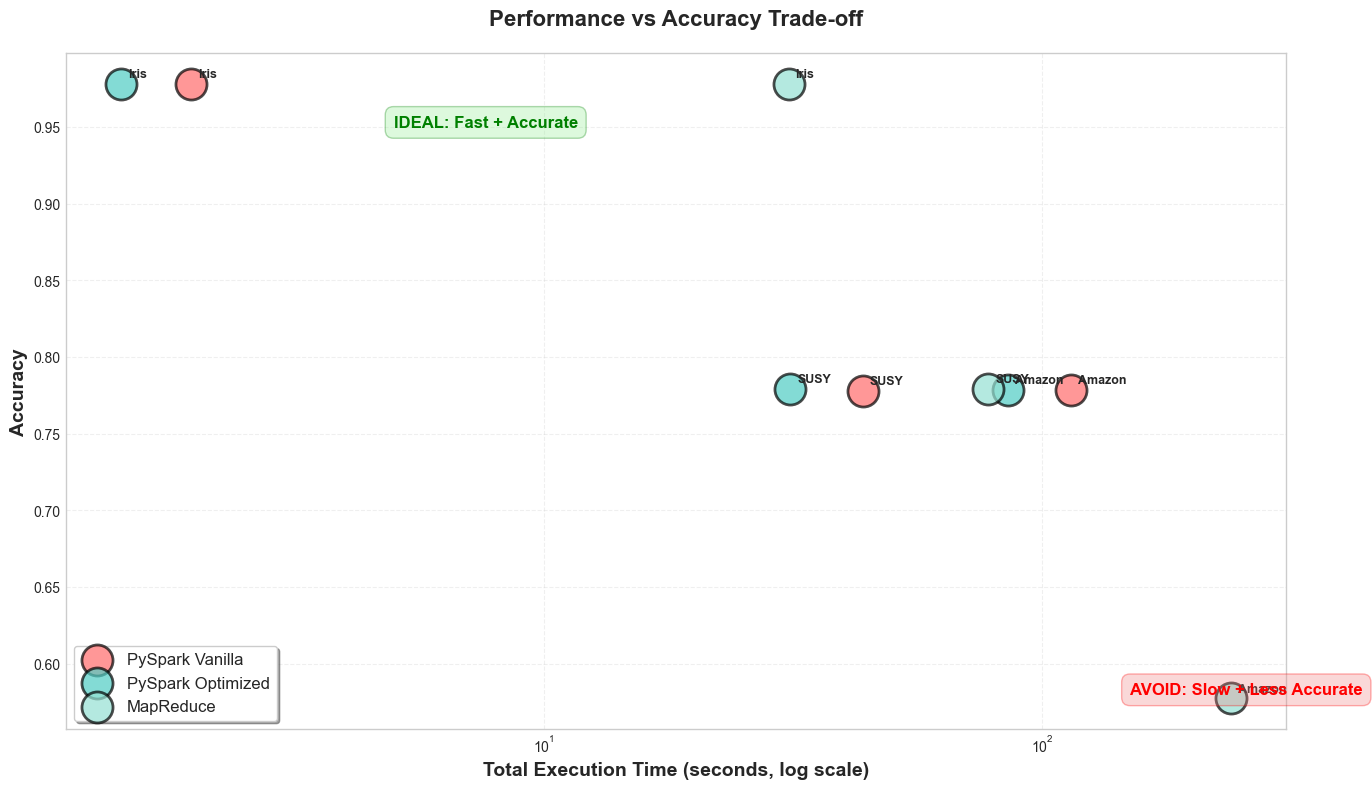

In [19]:
# ============================================================
# PLOT 4: COMBINED PERFORMANCE vs ACCURACY SCATTER
# ============================================================
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for scatter plot
scatter_data = []
for dataset_name in ['Iris', 'SUSY', 'Amazon']:
    for fw in ['PySpark Vanilla', 'PySpark Optimized', 'MapReduce']:
        scatter_data.append({
            'dataset': dataset_name,
            'framework': fw,
            'time': data[dataset_name]['total_time'][fw],
            'accuracy': data[dataset_name]['accuracy'][fw]
        })

df_scatter = pd.DataFrame(scatter_data)

# Plot each framework
for fw in ['PySpark Vanilla', 'PySpark Optimized', 'MapReduce']:
    fw_data = df_scatter[df_scatter['framework'] == fw]
    ax.scatter(fw_data['time'], fw_data['accuracy'], 
              s=500, alpha=0.7, label=fw, color=colors[fw],
              edgecolors='black', linewidth=2)
    
    # Add dataset labels
    for _, row in fw_data.iterrows():
        ax.annotate(row['dataset'], 
                   (row['time'], row['accuracy']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, fontweight='bold')

ax.set_xlabel('Total Execution Time (seconds, log scale)', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Performance vs Accuracy Trade-off', 
            fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True, loc='lower left')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xscale('log')

# Add ideal region annotation
ax.annotate('IDEAL: Fast + Accurate', 
           xy=(5, 0.95), fontsize=12, color='green', fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', edgecolor='green', alpha=0.3))

ax.annotate('AVOID: Slow + Less Accurate', 
           xy=(150, 0.58), fontsize=12, color='red', fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', edgecolor='red', alpha=0.3))

plt.tight_layout()
plt.show()





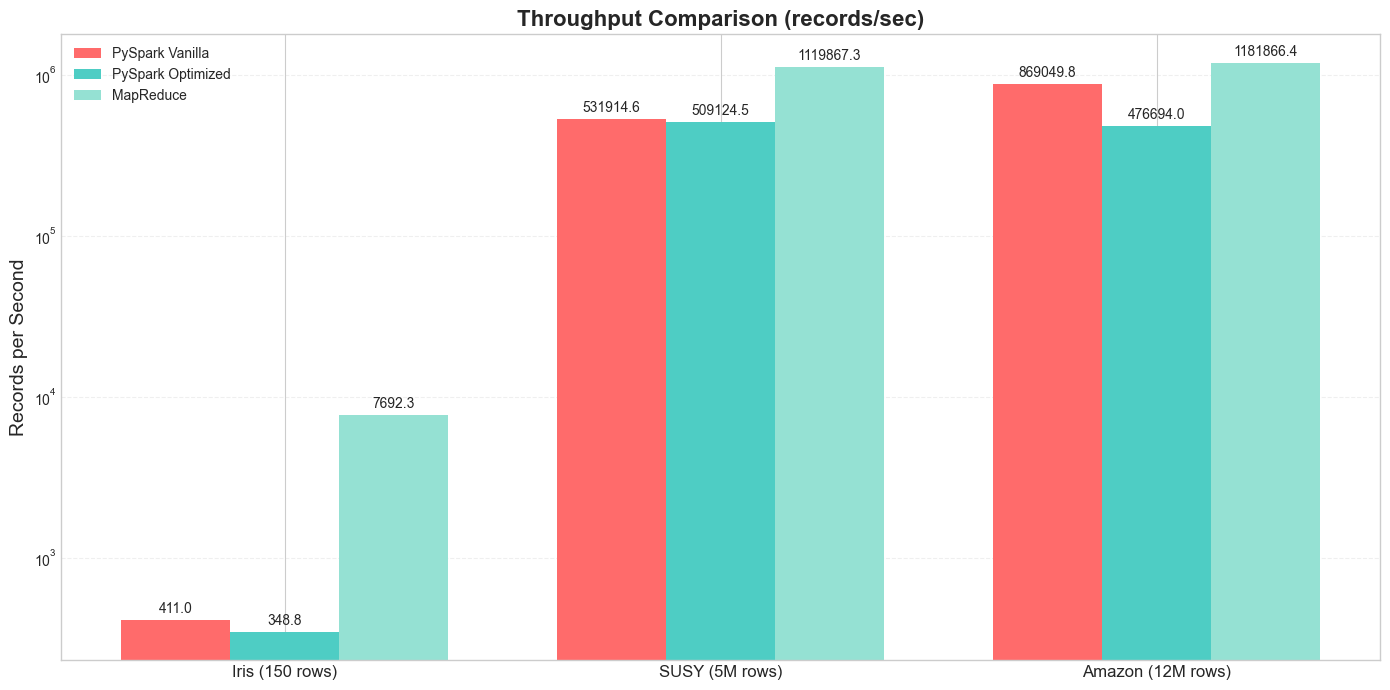

In [22]:
# ============================================================
# PLOT 5: THROUGHPUT COMPARISON (records/sec)
# ============================================================
fig, ax = plt.subplots(figsize=(14, 7))

vanilla_tput = [
    (total_records := (104+46), (0.43+0.30)/2), 
    (3499998, (7.94+5.22)/2), 
    (8473236, (11.78+7.72)/2)
]
optimized_tput = [
    (150, (0.49+0.37)/2),
    (3500231, (8.41+5.34)/2),
    (8473236, (15.20+20.35)/2)
]
mr_tput = [
    (45, (0.0065+0.0052)/2),
    (270000, (0.1277+0.3545)/2),
    (3381438, (5.3371+0.3851)/2)
]

# compute throughput = records / training_time
vanilla_vals = [r/t for r,t in vanilla_tput]
opt_vals =     [r/t for r,t in optimized_tput]
mr_vals =      [r/t for r,t in mr_tput]

x = np.arange(len(datasets))
width = 0.25

bars1 = ax.bar(x - width, vanilla_vals, width, label='PySpark Vanilla', color='#FF6B6B')
bars2 = ax.bar(x, opt_vals, width, label='PySpark Optimized', color='#4ECDC4')
bars3 = ax.bar(x + width, mr_vals, width, label='MapReduce', color='#95E1D3')

ax.set_title("Throughput Comparison (records/sec)", fontsize=16, fontweight="bold")
ax.set_ylabel("Records per Second", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=12)
ax.set_yscale("log")
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()

for c in [bars1, bars2, bars3]:
    ax.bar_label(c, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

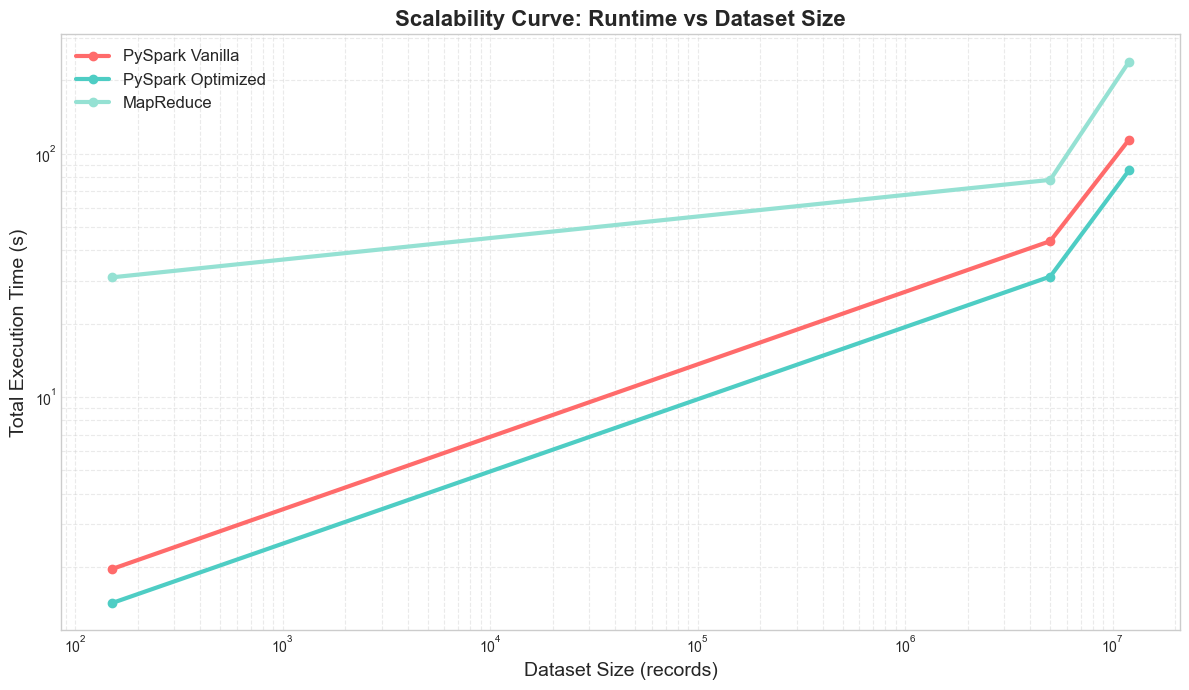

In [23]:
# ============================================================
# PLOT 6: SCALABILITY CURVE (dataset size vs runtime)
# ============================================================
fig, ax = plt.subplots(figsize=(12, 7))

sizes = [150, 5000000, 12000000]
vanilla = [data['Iris']['total_time']['PySpark Vanilla'],
           data['SUSY']['total_time']['PySpark Vanilla'],
           data['Amazon']['total_time']['PySpark Vanilla']]

optimized = [data['Iris']['total_time']['PySpark Optimized'],
             data['SUSY']['total_time']['PySpark Optimized'],
             data['Amazon']['total_time']['PySpark Optimized']]

mr = [data['Iris']['total_time']['MapReduce'],
      data['SUSY']['total_time']['MapReduce'],
      data['Amazon']['total_time']['MapReduce']]

ax.plot(sizes, vanilla, marker='o', linewidth=3, label='PySpark Vanilla', color='#FF6B6B')
ax.plot(sizes, optimized, marker='o', linewidth=3, label='PySpark Optimized', color='#4ECDC4')
ax.plot(sizes, mr, marker='o', linewidth=3, label='MapReduce', color='#95E1D3')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Dataset Size (records)", fontsize=14)
ax.set_ylabel("Total Execution Time (s)", fontsize=14)
ax.set_title("Scalability Curve: Runtime vs Dataset Size", fontsize=16, fontweight="bold")
ax.grid(True, which="both", linestyle="--", alpha=0.4)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
# ============================================================
# SUMMARY STATISTICS TABLE
# ============================================================
print("\n" + "="*100)
print("COMPREHENSIVE COMPARISON: PySpark Vanilla vs Optimized vs MapReduce")
print("="*100)

summary_data = []
for dataset_name, dataset_label in [('Iris', 'Iris (150 rows)'), 
                                     ('SUSY', 'SUSY (5M rows)'), 
                                     ('Amazon', 'Amazon (12M rows)')]:
    vanilla_time = data[dataset_name]['total_time']['PySpark Vanilla']
    opt_time = data[dataset_name]['total_time']['PySpark Optimized']
    mr_time = data[dataset_name]['total_time']['MapReduce']
    
    vanilla_acc = data[dataset_name]['accuracy']['PySpark Vanilla']
    opt_acc = data[dataset_name]['accuracy']['PySpark Optimized']
    mr_acc = data[dataset_name]['accuracy']['MapReduce']
    
    print(f"\n{dataset_label}:")
    print("-" * 100)
    print(f"{'Framework':<25} {'Time (s)':<15} {'Speedup':<15} {'Accuracy':<15} {'Acc. Difference'}")
    print("-" * 100)
    print(f"{'PySpark Vanilla':<25} {vanilla_time:<15.2f} {'1.00x (baseline)':<15} {vanilla_acc:<15.4f} {'-'}")
    print(f"{'PySpark Optimized':<25} {opt_time:<15.2f} {vanilla_time/opt_time:<15.2f}x {opt_acc:<15.4f} {opt_acc - vanilla_acc:+.4f}")
    print(f"{'MapReduce':<25} {mr_time:<15.2f} {vanilla_time/mr_time:<15.2f}x {mr_acc:<15.4f} {mr_acc - vanilla_acc:+.4f}")



COMPREHENSIVE COMPARISON: PySpark Vanilla vs Optimized vs MapReduce

Iris (150 rows):
----------------------------------------------------------------------------------------------------
Framework                 Time (s)        Speedup         Accuracy        Acc. Difference
----------------------------------------------------------------------------------------------------
PySpark Vanilla           1.96            1.00x (baseline) 0.9783          -
PySpark Optimized         1.42            1.38           x 0.9783          +0.0000
MapReduce                 31.00           0.06           x 0.9778          -0.0005

SUSY (5M rows):
----------------------------------------------------------------------------------------------------
Framework                 Time (s)        Speedup         Accuracy        Acc. Difference
----------------------------------------------------------------------------------------------------
PySpark Vanilla           43.68           1.00x (baseline) 0.7781    